In [1]:
! pip install yfinance

In [2]:
! pip install plotly

In [3]:
# Import yfinance
import yfinance as yf

# Import pandas
import pandas as pd

# Data Viz
import plotly.graph_objs as go
 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# Download the datafile from yfinance
data = yf.download(tickers='BTC-USD')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

Close
Date                  
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014

In [6]:
data.index = pd.to_datetime(data.index)
data.head().round(2)

Close
Date              
2014-09-17  457.33
2014-09-18  424.44
2014-09-19  394.80
2014-09-20  408.90
2014-09-21  398.82

In [7]:
data.shape

(2683, 1)

1. Analyze the time series. Do we have stationary data? What about autocorrelation?

C:\Users\manu2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bitcoin price')

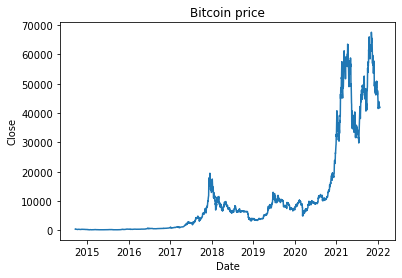

In [8]:
sns.lineplot(data.index, data.Close)
plt.title('Bitcoin price')

**1**. **Stationary**

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -1.14
5% Critical Value: -2.86
p-value: 0.70


### p-value is above 0.05 the null hypothesis is accepted. Thus, the data is not stationary.

Check with other stationary Method

In [10]:
from statsmodels.tsa.stattools import kpss

result = kpss(data.Close)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(5.4443194730615385, 0.01, 28, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 5.44
5% Critical Value: 0.46
p-value: 0.01


C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Now, p-value is below 0.05 the null hypothesis is rejected.

2. **Autocorrelation**

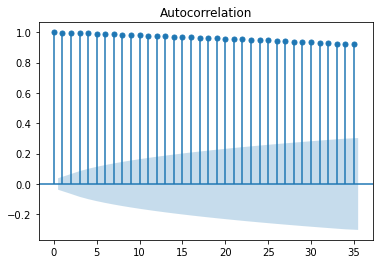

In [11]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(data.Close)
plt.show()

3. **Partial** **Autocorrelation**

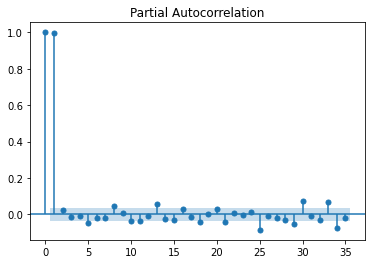

In [12]:
plot_pacf(data.Close)
plt.show()

Data is autocorrelated

#### 4. To make our data stationary

In [13]:
#First, use differnce method
data['differ'] = data['Close'].diff()

C:\Users\manu2\AppData\Local\Temp/ipykernel_13792/1269765865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['differ'] = data['Close'].diff()


In [14]:
data.head()

Close     differ
Date                             
2014-09-17  457.334015        NaN
2014-09-18  424.440002 -32.894012
2014-09-19  394.795990 -29.644012
2014-09-20  408.903992  14.108002
2014-09-21  398.821014 -10.082977

C:\Users\manu2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bitcoin price')

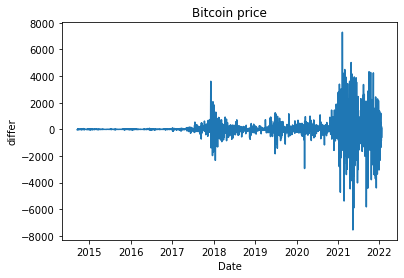

In [15]:
sns.lineplot(data.index, data.differ)
plt.title('Bitcoin price')

#### Test our result with stationary methods

In [16]:
result = adfuller(data.differ.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -8.36
5% Critical Value: -2.86
p-value: 0.00


### Now, p-value is below 0.05 the null hypothesis is Rejected. Thus, the data is stationary.

5. **AR_MODEL**

In [17]:
#By looking at the partial autocorrelation, the model will be first order
from statsmodels.tsa.arima_model import ARMA
model_AR1 = ARMA(data.differ.dropna(), order=(1, 0))
result_AR1 = model_AR1.fit()
result_AR1.summary()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2682
Model:                     ARMA(1, 0)   Log Likelihood              -21599.034
Method:                       css-mle   S.D. of innovations            760.817
Date:                Thu, 20 Jan 2022   AIC                          43204.067
Time:                        10:34:48   BIC                          43221.750
Sample:                    09-18-2014   HQIC                         43210.464
                         - 01-20-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.4566     14.217      1.087      0.277     -12.409      43.322
ar.L1.differ    -0.0333      0.019     -1.727      0.084      -0.071       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -30.0136           +0.0000j           30.0136            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
model_AR2 = ARMA(data.differ.dropna(), order=(10, 0))
result_AR2 = model_AR2.fit()
result_AR2.summary()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2682
Model:                    ARMA(10, 0)   Log Likelihood              -21575.952
Method:                       css-mle   S.D. of innovations            754.278
Date:                Thu, 20 Jan 2022   AIC                          43175.904
Time:                        10:34:48   BIC                          43246.635
Sample:                    09-18-2014   HQIC                         43201.491
                         - 01-20-2022                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.4566     16.585      0.932      0.351     -17.049      47.962
ar.L1.differ     -0.0382      0.019     -1.982      0.047      -0.076      -0.000
ar.L2.differ      0.0115      0.019      0.597      0.550      -0.026       0.049
ar.L3.differ      0.0152      0.019      0.794      0.427      -0.022       0.053
ar.L4.differ      0.0480      0.019      2.499      0.012       0.010       0.086
ar.L5.differ      0.0215      0.019      1.123      0.262      -0.016       0.059
ar.L6.differ      0.0190      0.019      0.989      0.323      -0.019       0.057
ar.L7.differ     -0.0561      0.019     -2.927      0.003      -0.094      -0.019
ar.L8.differ     -0.0364      0.019     -1.893      0.058      -0.074       0.001
ar.L9.differ      0.0695      0.019      3.612      0.000       0.032       0.107
ar.L10.differ     0.0682      0.019      3.541      0.000       0.030       0.106
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.2606           -0.0000j            1.2606           -0.0000
AR.2             1.0459           -0.7289j            1.2749           -0.0969
AR.3             1.0459           +0.7289j            1.2749            0.0969
AR.4             0.3091           -1.1674j            1.2076           -0.2088
AR.5             0.3091           +1.1674j            1.2076            0.2088
AR.6            -0.5343           -1.1652j            1.2819           -0.3184
AR.7            -0.5343           +1.1652j            1.2819            0.3184
AR.8            -1.2467           -0.7339j            1.4467           -0.4153
AR.9            -1.2467           +0.7339j            1.4467            0.4153
AR.10           -1.4270           -0.0000j            1.4270           -0.5000
------------------------------------------------------------------------------
"""

6. **Model_MA**

In [19]:
model_MA1 = ARMA(data.differ.dropna(), order=(0,1))
result_MA1 = model_MA1.fit()
result_MA1.summary()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2682
Model:                     ARMA(0, 1)   Log Likelihood              -21599.050
Method:                       css-mle   S.D. of innovations            760.821
Date:                Thu, 20 Jan 2022   AIC                          43204.099
Time:                        10:34:50   BIC                          43221.782
Sample:                    09-18-2014   HQIC                         43210.496
                         - 01-20-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.4566     14.207      1.088      0.277     -12.389      43.302
ma.L1.differ    -0.0330      0.019     -1.719      0.086      -0.071       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           30.3481           +0.0000j           30.3481            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
model_MA2 = ARMA(data.differ.dropna(), order=(0,10))
result_MA2 = model_MA2.fit()
result_MA2.summary()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2682
Model:                    ARMA(0, 10)   Log Likelihood              -21573.463
Method:                       css-mle   S.D. of innovations            753.573
Date:                Thu, 20 Jan 2022   AIC                          43170.925
Time:                        10:34:51   BIC                          43241.657
Sample:                    09-18-2014   HQIC                         43196.513
                         - 01-20-2022                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.4566     16.796      0.920      0.357     -17.464      48.377
ma.L1.differ     -0.0370      0.019     -1.922      0.055      -0.075       0.001
ma.L2.differ      0.0232      0.019      1.201      0.230      -0.015       0.061
ma.L3.differ      0.0156      0.019      0.802      0.422      -0.022       0.054
ma.L4.differ      0.0315      0.020      1.610      0.107      -0.007       0.070
ma.L5.differ      0.0250      0.020      1.277      0.202      -0.013       0.063
ma.L6.differ      0.0461      0.021      2.237      0.025       0.006       0.086
ma.L7.differ     -0.0612      0.020     -3.083      0.002      -0.100      -0.022
ma.L8.differ     -0.0385      0.021     -1.856      0.063      -0.079       0.002
ma.L9.differ      0.0853      0.021      4.122      0.000       0.045       0.126
ma.L10.differ     0.0648      0.018      3.530      0.000       0.029       0.101
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
MA.1             1.1970           -0.4130j            1.2662           -0.0529
MA.2             1.1970           +0.4130j            1.2662            0.0529
MA.3             0.7169           -0.9770j            1.2118           -0.1493
MA.4             0.7169           +0.9770j            1.2118            0.1493
MA.5            -0.1071           -1.2059j            1.2106           -0.2641
MA.6            -0.1071           +1.2059j            1.2106            0.2641
MA.7            -0.9721           -0.9545j            1.3624           -0.3765
MA.8            -0.9721           +0.9545j            1.3624            0.3765
MA.9            -1.4935           -0.4249j            1.5528           -0.4559
MA.10           -1.4935           +0.4249j            1.5528            0.4559
------------------------------------------------------------------------------
"""

**7**. **Models**

In [21]:
len(data)

2683

In [22]:
# Step 1: Split the dataset:
test_size = 500

df_train = data['differ'][:-test_size]
df_test = data['differ'][-test_size:]

In [23]:
print(len(df_train))
print(len(df_test))

2183
500


In [24]:
df_test.head()

Date
2020-09-08   -238.046875
2020-09-09    110.831055
2020-09-10    120.791016
2020-09-11     37.776367
2020-09-12     41.255859
Name: differ, dtype: float64

In [25]:
# Step 2 Apply the model:
# 1. AR Model
model_AR_1 = ARMA(df_train.dropna(), order=(1, 0))
result_AR_1 = model_AR_1.fit()
result_AR_1.summary()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2182
Model:                     ARMA(1, 0)   Log Likelihood              -15435.377
Method:                       css-mle   S.D. of innovations            285.722
Date:                Thu, 20 Jan 2022   AIC                          30876.755
Time:                        10:34:51   BIC                          30893.819
Sample:                    09-18-2014   HQIC                         30882.993
                         - 09-07-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.5427      6.209      0.732      0.464      -7.628      16.713
ar.L1.differ     0.0150      0.021      0.699      0.485      -0.027       0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           66.8808           +0.0000j           66.8808            0.0000
-----------------------------------------------------------------------------
"""

In [26]:
# Predict the model:
predict_AR_1=result_AR_1.predict(df_test.index[0],df_test.index[-1])
predict_AR_1

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2020-09-08    5.808701
2020-09-09    4.561658
2020-09-10    4.543012
2020-09-11    4.542734
2020-09-12    4.542729
                ...   
2022-01-16    4.542729
2022-01-17    4.542729
2022-01-18    4.542729
2022-01-19    4.542729
2022-01-20    4.542729
Freq: D, Length: 500, dtype: float64

In [27]:
# Calculate RMSE for the model:
from statsmodels.tools.eval_measures import rmse
RMSE_AR_1 = rmse(df_test,predict_AR_1)
RMSE_AR_1

1659.113158326757

In [28]:
# 1. MA Model:
model_MA_1 = ARMA(df_train.dropna(), order=(0, 1))
result_MA_1 = model_MA_1.fit()
result_MA_1.summary()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 differ   No. Observations:                 2182
Model:                     ARMA(0, 1)   Log Likelihood              -15435.374
Method:                       css-mle   S.D. of innovations            285.722
Date:                Thu, 20 Jan 2022   AIC                          30876.747
Time:                        10:34:52   BIC                          30893.811
Sample:                    09-18-2014   HQIC                         30882.985
                         - 09-07-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.5427      6.209      0.732      0.464      -7.628      16.713
ma.L1.differ     0.0152      0.022      0.704      0.481      -0.027       0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -65.8739           +0.0000j           65.8739            0.5000
-----------------------------------------------------------------------------
"""

In [29]:
# Predict the model:
predict_MA_1=result_MA_1.predict(df_test.index[0],df_test.index[-1])
predict_MA_1

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2020-09-08    5.802338
2020-09-09    4.542727
2020-09-10    4.542727
2020-09-11    4.542727
2020-09-12    4.542727
                ...   
2022-01-16    4.542727
2022-01-17    4.542727
2022-01-18    4.542727
2022-01-19    4.542727
2022-01-20    4.542727
Freq: D, Length: 500, dtype: float64

In [30]:
# Calculate RMSE for the model:
from statsmodels.tools.eval_measures import rmse
RMSE_MA_1 = rmse(df_test,predict_MA_1)
RMSE_MA_1

1659.113159017588

**8**. **Model_Summary**

In [31]:
from statsmodels.tools.eval_measures import aic
import numpy as np

In [32]:
Models = pd.DataFrame({'Models': ['AR','MA'],'RMSE': [RMSE_AR_1, RMSE_MA_1], 'AIC': [result_AR_1.aic, result_MA_1.aic], 'BIC': [result_AR_1.bic, result_MA_1.bic]})
Models

Models         RMSE           AIC           BIC
0     AR  1659.113158  30876.754595  30893.818586
1     MA  1659.113159  30876.747039  30893.811031

**9**. **ARIMA_Model** ***(With the help of in-build model function)***

In [33]:
!pip install pmdarima

In [34]:
import pmdarima as pm
from pmdarima import auto_arima
data_arima=data['differ'].dropna()

In [35]:
data_arima.isnull().sum()

0

In [36]:
model = auto_arima(data_arima.dropna(), start_p=0, start_q=0,
                          max_p=2, max_q=2,m=12,start_P=0,start_Q=0, 
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=47037.713, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=45189.515, Time=1.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=46230.968, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=44966.251, Time=3.22 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.24 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=45770.701, Time=0.79 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=44637.279, Time=4.39 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=44834.014, Time=2.05 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=8.05 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.28 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=7.28 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=5.83 sec
 ARIMA(2,1,0)(2,1,0)[12] intercept   : AIC=4463

In [37]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2682
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -22313.640
Date:                            Thu, 20 Jan 2022   AIC                          44637.279
Time:                                    10:35:45   BIC                          44666.727
Sample:                                         0   HQIC                         44647.934
                                           - 2682                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6857      0.008    -81.546      0.000      -0.702      -0.669
ar.L2         -0.3420      0.008   

#### 10. ARMA Model (with the help of function)

In [46]:
def model_ARMA(order_list, var):
    
    results = []
    
    for order in (order_list):
        try: 
            model = ARMA(var, order=order).fit()
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic, model.bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, q)', 'AIC', 'BIC']

    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [47]:
p = range(5)
q =range(5)
order_list = [(x,y) for x in p for y in q]  

In [51]:
len(order_list)

25

In [52]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
result_ARMA = model_ARMA(order_list, data.differ.dropna())

In [53]:
result_ARMA

(p, q)           AIC           BIC
0   (4, 4)  43163.127795  43222.070976
1   (4, 2)  43182.833207  43229.987751
2   (2, 4)  43182.864901  43230.019446
3   (4, 3)  43184.832765  43237.881628
4   (3, 3)  43190.969599  43238.124144
5   (3, 4)  43192.004495  43245.053358
6   (2, 2)  43194.153449  43229.519357
7   (0, 4)  43202.484056  43237.849964
8   (4, 0)  43203.593372  43238.959280
9   (1, 4)  43203.894224  43245.154450
10  (1, 2)  43203.944710  43233.416301
11  (4, 1)  43204.002127  43245.262354
12  (2, 1)  43204.027707  43233.499298
13  (1, 0)  43204.067425  43221.750379
14  (0, 1)  43204.099246  43221.782201
15  (0, 0)  43205.047463  43216.836099
16  (1, 3)  43205.523730  43240.889638
17  (3, 1)  43205.810088  43241.175996
18  (0, 2)  43206.001939  43229.579211
19  (2, 0)  43206.012395  43229.589667
20  (1, 1)  43206.019809  43229.597081
21  (2, 3)  43207.690690  43248.950917
22  (0, 3)  43207.698660  43237.170250
23  (3, 2)  43207.790653  43249.050879
24  (3, 0)  43207.835638  43237.307228

In [55]:
result_ARMA[result_ARMA.AIC == result_ARMA.AIC.min()]

(p, q)           AIC           BIC
0  (4, 4)  43163.127795  43222.070976

### The lowest AIC is observed for (4,4). The best model is (4,4) AIC

In [59]:
# Test the model with (2,1,0) ARIMA
from statsmodels.tsa.arima_model import ARIMA
Model_ARIMA = ARIMA(data.differ.dropna(), order=(2,2,4))
Result_ARIMA = Model_ARIMA.fit()
Result_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D2.differ   No. Observations:                 2680
Model:                 ARIMA(2, 2, 4)   Log Likelihood              -21566.031
Method:                       css-mle   S.D. of innovations            750.871
Date:                Thu, 20 Jan 2022   AIC                          43148.062
Time:                        11:02:37   BIC                          43195.210
Sample:                    09-20-2014   HQIC                         43165.119
                         - 01-20-2022                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e-07   9.16e-06      0.027      0.978   -1.77e-05    1.82e-05
ar.L1.D2.differ    -0.4815      0.004   -116.051      0.000      -0.490      -0.473
ar.L2.D2.differ    -0.9804      0.004   -243.403      0.000      -0.988      -0.972
ma.L1.D2.differ    -1.5436        nan        nan        nan         nan         nan
ma.L2.D2.differ     1.0872   1.21e-07      9e+06      0.000       1.087       1.087
ma.L3.D2.differ    -1.5436        nan        nan        nan         nan         nan
ma.L4.D2.differ     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2455           -0.9796j            1.0100           -0.2891
AR.2           -0.2455           +0.9796j            1.0100            0.2891
MA.1           -0.2282           -0.9736j            1.0000           -0.2866
MA.2           -0.2282           +0.9736j            1.0000            0.2866
MA.3            1.0000           -0.0000j            1.0000           -0.0000
MA.4            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [70]:
Predict_ARIMA=Result_ARIMA.predict(start='2022-01-20 00:00:00', end='2022-01-27 00:00:00')
Predict_ARIMA

2022-01-20    1054.264204
2022-01-21    -402.260247
2022-01-22    -805.062442
2022-01-23    -287.181229
2022-01-24    1428.479000
2022-01-25    -406.198427
2022-01-26   -1204.896353
2022-01-27     978.334051
Freq: D, dtype: float64

#### 11. Make the forecast for the 5 periods

In [71]:
pred_test = pd.date_range("2022-01-20", periods=6, freq="D")

In [72]:
pred_test

DatetimeIndex(['2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
               '2022-01-24', '2022-01-25'],
              dtype='datetime64[ns]', freq='D')

In [73]:
def predictions_bitcoin(Predict_ARIMA):
    
    result_bitcoin=[data.loc['2022-01-20 00:00:00', 'Close']]
    
    for i in range(1,6):
        result_bitcoin.append(result_bitcoin[-1]+Predict_ARIMA[i])
    return result_bitcoin

In [74]:
result_bitcoin = predictions_bitcoin(Predict_ARIMA)

In [75]:
result_bitcoin

[41911.84765625,
 41509.587408812666,
 40704.524967177065,
 40417.3437380683,
 41845.822738505965,
 41439.62431121472]

In [76]:
Bitcoin = pd.DataFrame({'Date': pred_test, 'Price': result_bitcoin})
Bitcoin

Date         Price
0 2022-01-20  41911.847656
1 2022-01-21  41509.587409
2 2022-01-22  40704.524967
3 2022-01-23  40417.343738
4 2022-01-24  41845.822739
5 2022-01-25  41439.624311